# Figure 5

The data needed to reproduce this figure is computed from the raw data by running "write_JSD_day.py" and "write_JSD_hour.py" located in the "src/" folder. 

In [1]:
import os, sys, codecs
import numpy as np
import pylab as plt
import pandas as pd
import gzip
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.cm as cm
import random

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.pardir,'src')))

from modules_distributor import fit
from general import *
from jsd import *

JSD_data_path = "../output/JSD/"

# Daily

In [5]:
day_path = "day/"

Dt_day = np.load(JSD_data_path + day_path + "Dt.npy")
JSD1_day = np.load(JSD_data_path + day_path + "jsd1.npy") # JSD with alpha = 1
JSD2_day = np.load(JSD_data_path + day_path + "jsd2.npy") # JSD with alpha = 2

unique_day, counts = np.unique(Dt_day, return_counts = True)
Dt_day_occurences = dict(zip(unique_day, counts))  
# Dt of 0 occurs 392 times, +- 1 occurs 391 times, etc.

In [ ]:
avg_JSD2_day = []
sd_JSD2_day = []

avg_sqrt_JSD1_day = []
sd_sqrt_JSD1_day = []
avg_sqrt_JSD2_day = []
sd_sqrt_JSD2_day = []

for delta_t in Dt_day_occurences:
    avg_JSD2_day.append(np.mean(JSD2_day[Dt_day == delta_t]))
    sd_JSD2_day.append(np.std(JSD2_day[Dt_day == delta_t], ddof=1)) # ddof = 1 means the sample sd
    
    sd_sqrt_JSD2_day.append(np.std(np.sqrt(JSD2_day[Dt_day == delta_t]), ddof=1))  
    # we sqrt the data and then compute mean
    avg_sqrt_JSD2_day.append(np.mean(np.sqrt(JSD2_day[Dt_day == delta_t]))) # and sample sd
    sd_sqrt_JSD1_day.append(np.std(np.sqrt(JSD1_day[Dt_day == delta_t]), ddof=1))  
    # we sqrt the data and then compute mean
    avg_sqrt_JSD1_day.append(np.mean(np.sqrt(JSD1_day[Dt_day == delta_t]))) # and sample sd
    
#warning is due to NaN for delta_t = -391 and 391 as we only have 1 observation for each

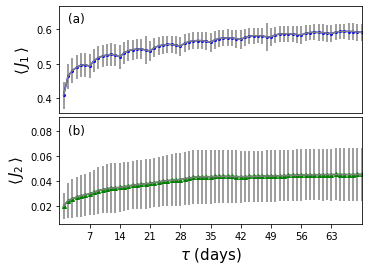

In [9]:
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.errorbar(np.array(unique_day)[unique_day > 0], np.array(avg_sqrt_JSD1_day)[unique_day > 0], 
             yerr = np.array(sd_sqrt_JSD1_day)[unique_day > 0], color = "gray")
plt.plot(np.array(unique_day)[unique_day > 0], np.array(avg_sqrt_JSD1_day)[unique_day > 0], "o-b", 
                                                             markersize = 2, label = r"$\alpha=1$")
plt.xlim(0, 70)
plt.xticks([])
plt.ylabel(r"$\langle \, J_1 \, \rangle$", fontsize = 15)
plt.text(2, 0.62, "(a)", fontsize = 12)

plt.subplot(2, 1, 2)
plt.errorbar(np.array(unique_day)[unique_day > 0], np.array(avg_sqrt_JSD2_day)[unique_day > 0], 
             yerr = np.array(sd_sqrt_JSD2_day)[unique_day > 0], color = "gray")
plt.plot(np.array(unique_day)[unique_day > 0], np.array(avg_sqrt_JSD2_day)[unique_day > 0], "^-g", 
                                                             markersize = 4, label = r"$\alpha=2$")
plt.ylabel(r"$\langle \, J_2 \, \rangle$", fontsize = 15)
plt.xlim(0, 70)
plt.xlabel(r"$\tau$" + " (days)", fontsize = 15)
plt.xticks(np.arange(7, 70, 7), np.arange(7, 100, 7))
plt.text(2, 0.078, "(b)", fontsize = 12)

plt.subplots_adjust(hspace = 0.03, left = 0.2)
plt.show()

# Hour

In [10]:
hour_path = "hour/"

Dt_hour = np.load(JSD_data_path + hour_path + "Dt.npy")
JSD1_hour = np.load(JSD_data_path + hour_path + "jsd1.npy") # JSD with alpha = 1
JSD2_hour = np.load(JSD_data_path + hour_path + "jsd2.npy") # JSD with alpha = 2

unique_hour, counts_hour = np.unique(Dt_hour, return_counts = True)
counts_hour = counts_hour[~np.isnan(unique_hour)] # removing nans
unique_hour = unique_hour[~np.isnan(unique_hour)] 

In [13]:
avg_sqrt_JSD1_hour = []
sd_sqrt_JSD1_hour = []
avg_sqrt_JSD2_hour = []
sd_sqrt_JSD2_hour = []

for delta_t in unique_hour:
    sd_sqrt_JSD1_hour.append(np.std(np.sqrt(JSD1_hour[Dt_hour == delta_t]), ddof = 1))
    avg_sqrt_JSD1_hour.append(np.mean(np.sqrt(JSD1_hour[Dt_hour == delta_t])))
    sd_sqrt_JSD2_hour.append(np.std(np.sqrt(JSD2_hour[Dt_hour == delta_t]), ddof = 1))
    avg_sqrt_JSD2_hour.append(np.mean(np.sqrt(JSD2_hour[Dt_hour == delta_t])))

Finding the gradient for each  𝛿𝑡 , by symmetry we only work with the positive  𝛿𝑡 .

In [14]:
abs_unique_hour = unique_hour[unique_hour >= 0]
abs_counts_hour = counts_hour[unique_hour >= 0]

abs_avg_sqrt_JSD1_hour = np.array(avg_sqrt_JSD1_hour)[unique_hour >= 0]
abs_avg_sqrt_JSD2_hour = np.array(avg_sqrt_JSD2_hour)[unique_hour >= 0]
abs_sd_sqrt_JSD1_hour = np.array(sd_sqrt_JSD1_hour)[unique_hour >= 0]
abs_sd_sqrt_JSD2_hour = np.array(sd_sqrt_JSD2_hour)[unique_hour >= 0]

slope_JSD1_hour = np.divide(abs_avg_sqrt_JSD1_hour[1:]-abs_avg_sqrt_JSD1_hour[:-1], 
                                            abs_unique_hour[1:]-abs_unique_hour[:-1])
slope_JSD2_hour = np.divide(abs_avg_sqrt_JSD2_hour[1:]-abs_avg_sqrt_JSD2_hour[:-1], 
                                            abs_unique_hour[1:]-abs_unique_hour[:-1])

Fitting linear regression for both lines.

In [19]:
x_start = 2 # if we use 1, the rapid change from delta t = 1 to delta t = 2 is too rapid

coef_JSD1 = np.polyfit(np.log10(abs_unique_hour[x_start:]), np.log10(slope_JSD1_hour[x_start-1:]), 1) 
# 0th element = slope, 1st element = intercept
plot_y_JSD1 = 10 ** coef_JSD1[1] * abs_unique_hour[x_start:] ** coef_JSD1[0]

JSD1 slope:  -1.204576476604967 , intercept:  -1.029032256686731


In [20]:
coef_JSD2 = np.polyfit(np.log10(abs_unique_hour[1:][slope_JSD2_hour > 0]), 
                                   np.log10(slope_JSD2_hour[slope_JSD2_hour > 0]), 1) 
                                   # 0th element = slope, 1st element = intercept
plot_y_JSD2 = 10 ** coef_JSD2[1] * abs_unique_hour[1:][slope_JSD2_hour > 0] ** coef_JSD2[0]

JSD2 slope:  -1.033948128096025 , intercept:  -2.02958363228926


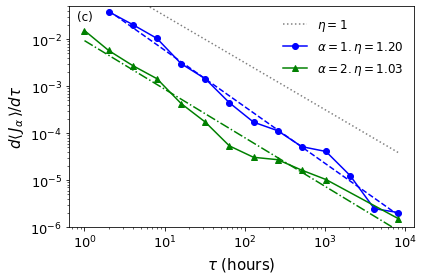

In [22]:
plt.plot(abs_unique_hour[x_start:], plot_y_fixed, ":", label = "$\eta = 1$", color = "grey")

plt.plot(abs_unique_hour[x_start:], slope_JSD1_hour[x_start-1:], "o-", markersize = 6, color = "b", 
         label = r"$\alpha=1. \eta=$" + str('{:.2f}'.format(np.abs(round(coef_JSD1[0], 2)))))
plt.plot(abs_unique_hour[1:][slope_JSD2_hour > 0], slope_JSD2_hour[slope_JSD2_hour > 0], "^-", 
        markersize = 6, color = "g", label = r"$\alpha=2. \eta=$" + str(np.abs(round(coef_JSD2[0], 2))))

plt.plot(abs_unique_hour[x_start:], plot_y_JSD1, linestyle = "--", color = "blue")
plt.plot(abs_unique_hour[1:][slope_JSD2_hour > 0], plot_y_JSD2, linestyle = "-.", color = "green")

plt.loglog()
plt.xlabel(r"$\tau$ " + "(hours)", fontsize = 15)
plt.ylabel(r"$d\langle \, J_\alpha  \, \rangle/d\tau$", fontsize = 15)
plt.legend(frameon = False, prop={'size': 12})
plt.text(0.81, 0.025, "(c)", fontsize = 12)
plt.ylim(10e-7, 0.05)
plt.tick_params(labelsize = 13)

plt.tight_layout()
plt.show()